# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, TruncatedSVD
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [5]:
path='drive/My Drive/Datasets/'

In [6]:
df=pd.read_csv(path+"Train.csv")

In [7]:
df.shape

(23856, 18)

# Label and 15 principal components

In [8]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [9]:
df['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [16]:
df['MULTIPLE_OFFENSE'].value_counts(normalize=True)

1    0.955231
0    0.044769
Name: MULTIPLE_OFFENSE, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [11]:
df['DATE']=pd.to_datetime(df['DATE'])

# Checking Null Values

In [12]:
df.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [13]:
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [14]:
df['X_12'].value_counts()

1.0     15674
0.0      5171
2.0      2039
3.0       476
4.0       176
5.0        59
6.0        36
8.0         9
10.0        7
9.0         6
7.0         4
11.0        4
15.0        2
20.0        2
17.0        1
58.0        1
50.0        1
40.0        1
16.0        1
90.0        1
12.0        1
30.0        1
14.0        1
Name: X_12, dtype: int64

In [15]:
df.loc[df['X_12'].isnull(),['MULTIPLE_OFFENSE']].sum()

MULTIPLE_OFFENSE    182
dtype: int64

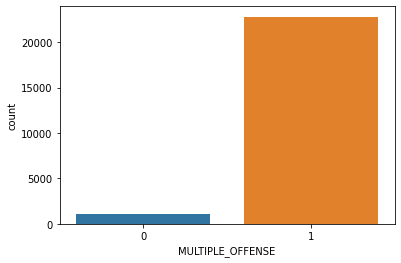

In [17]:
sns.countplot(df['MULTIPLE_OFFENSE'])

# Visualizing outliers

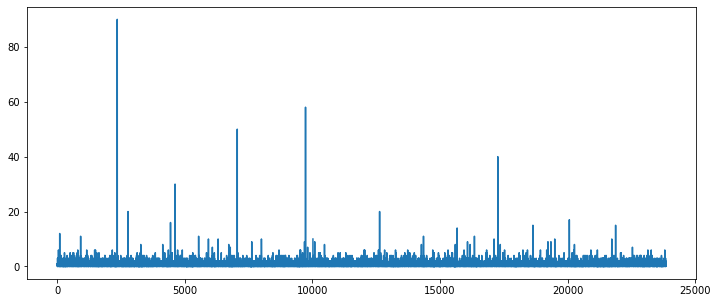

In [18]:
plt.figure(figsize=(12,5))
df['X_12'].plot()

In [19]:
un_df=df.loc[df['MULTIPLE_OFFENSE']==0,:]

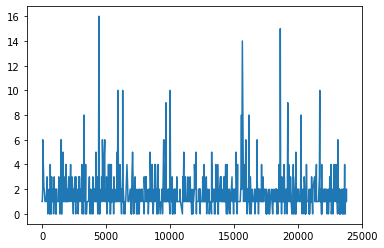

In [20]:
un_df['X_12'].plot()

# UnderSampling

In [21]:
hack_df=df.loc[df['MULTIPLE_OFFENSE']==0]
unhack_df=df.loc[df['MULTIPLE_OFFENSE']==1][:1068]

new_df=pd.concat([hack_df, unhack_df])
new_df=new_df.sample(frac=1, random_state=42)
new_df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
456,CR_19922,1994-09-22,0,16,15,0,0,1,0,0,5,1,102,1.0,24,93,34,1
5285,CR_24242,1994-03-18,0,49,49,6,5,6,4,0,5,3,179,1.0,112,62,36,0
10019,CR_103074,2004-09-18,1,38,38,10,3,12,16,1,6,10,58,10.0,72,29,34,0
6959,CR_5034,1992-12-20,0,6,6,4,1,6,4,0,5,2,192,0.0,113,93,0,0
860,CR_170838,2014-03-07,0,37,37,0,0,7,1,0,5,1,313,0.0,115,77,0,1


In [22]:
new_df.reset_index(inplace=True)

In [23]:
new_df.drop(columns=['index'],inplace=True)
new_df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_19922,1994-09-22,0,16,15,0,0,1,0,0,5,1,102,1.0,24,93,34,1
1,CR_24242,1994-03-18,0,49,49,6,5,6,4,0,5,3,179,1.0,112,62,36,0
2,CR_103074,2004-09-18,1,38,38,10,3,12,16,1,6,10,58,10.0,72,29,34,0
3,CR_5034,1992-12-20,0,6,6,4,1,6,4,0,5,2,192,0.0,113,93,0,0
4,CR_170838,2014-03-07,0,37,37,0,0,7,1,0,5,1,313,0.0,115,77,0,1


In [24]:
new_df

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_19922,1994-09-22,0,16,15,0,0,1,0,0,5,1,102,1.0,24,93,34,1
1,CR_24242,1994-03-18,0,49,49,6,5,6,4,0,5,3,179,1.0,112,62,36,0
2,CR_103074,2004-09-18,1,38,38,10,3,12,16,1,6,10,58,10.0,72,29,34,0
3,CR_5034,1992-12-20,0,6,6,4,1,6,4,0,5,2,192,0.0,113,93,0,0
4,CR_170838,2014-03-07,0,37,37,0,0,7,1,0,5,1,313,0.0,115,77,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,CR_164244,2013-03-20,0,33,32,2,1,7,1,0,5,1,174,0.0,92,93,50,1
2132,CR_187216,2017-07-25,0,21,23,4,1,4,2,0,5,1,174,0.0,111,103,43,1
2133,CR_135371,2009-07-26,0,4,4,6,5,5,6,0,5,1,174,1.0,103,29,34,1
2134,CR_139432,2009-07-18,0,36,34,2,1,3,5,1,2,1,316,1.0,92,142,34,1


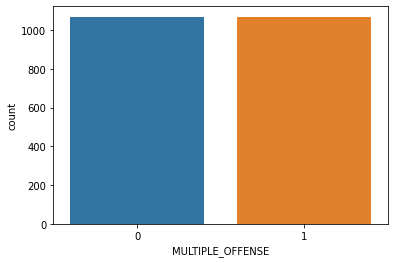

In [25]:
sns.countplot(new_df['MULTIPLE_OFFENSE'])

# Correlation of imbalanced data

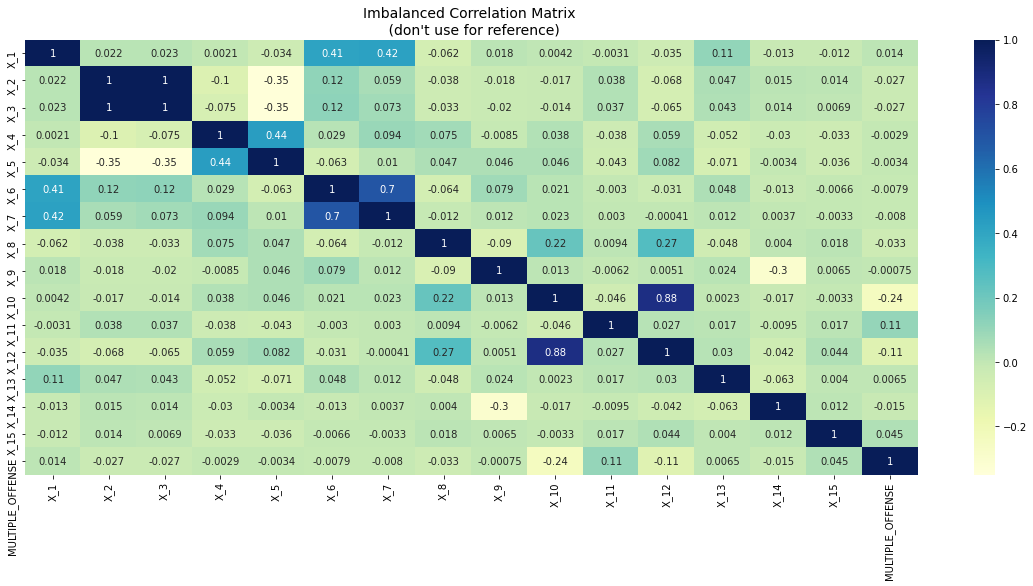

In [34]:
plt.figure(figsize=(20,8))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)
plt.show()

# Correlation of balanced data

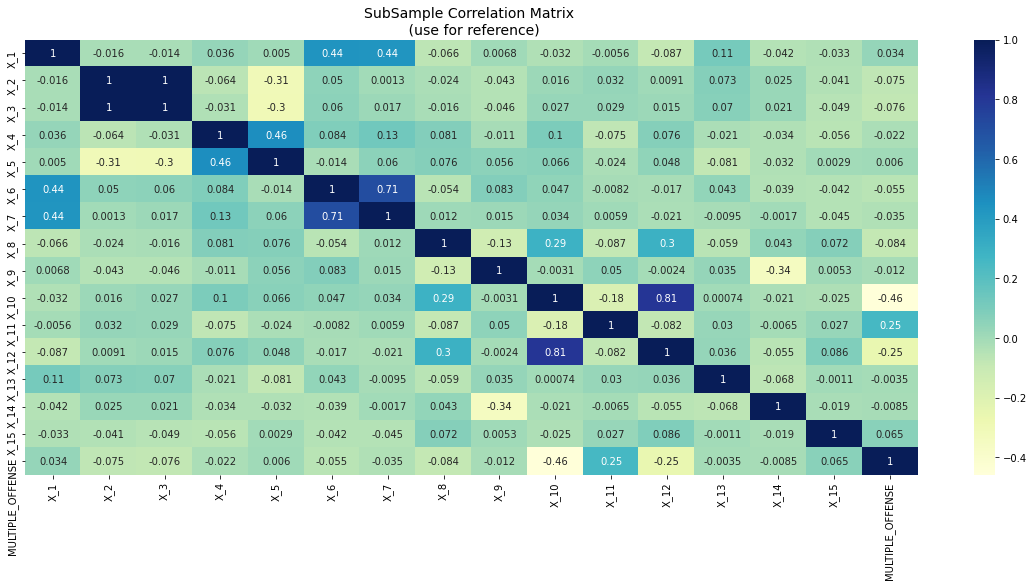

In [35]:
plt.figure(figsize=(20,8))
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap="YlGnBu", annot=True,)
plt.title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [36]:
col=new_df.columns
col=list(col)

In [37]:
type(col)

list

In [38]:
col.remove("MULTIPLE_OFFENSE")
col.remove("INCIDENT_ID")
col.remove("DATE")

Text(0.5, 1.0, 'X_7 vs target')

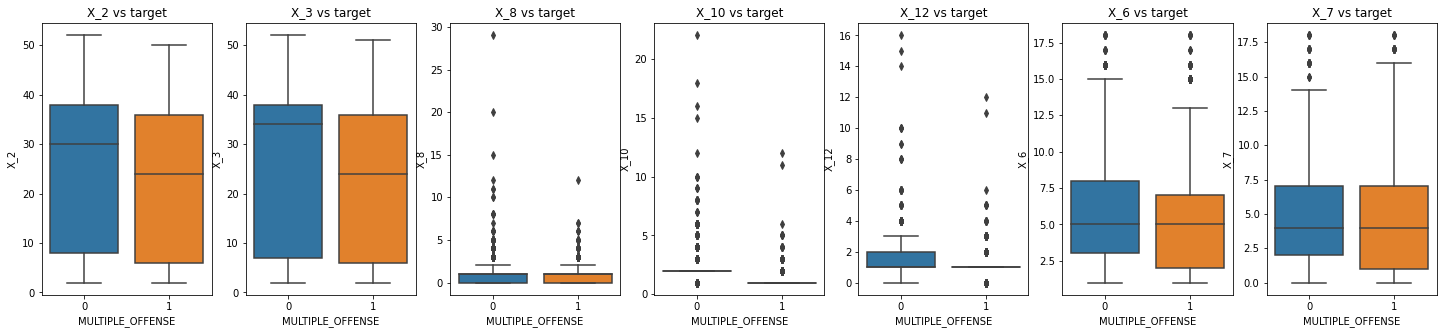

In [39]:
f,axes=plt.subplots(ncols=7, figsize=(25,5))

sns.boxplot(x="MULTIPLE_OFFENSE", y="X_2", data=new_df, ax=axes[0])
axes[0].set_title("X_2 vs target")

sns.boxplot(x="MULTIPLE_OFFENSE", y="X_3", data=new_df, ax=axes[1])
axes[1].set_title("X_3 vs target")

sns.boxplot(x="MULTIPLE_OFFENSE", y="X_8", data=new_df, ax=axes[2])
axes[2].set_title("X_8 vs target")

sns.boxplot(x="MULTIPLE_OFFENSE", y="X_10", data=new_df, ax=axes[3])
axes[3].set_title("X_10 vs target")

sns.boxplot(x="MULTIPLE_OFFENSE", y="X_12", data=new_df, ax=axes[4])
axes[4].set_title("X_12 vs target")

sns.boxplot(x="MULTIPLE_OFFENSE", y="X_6", data=new_df, ax=axes[5])
axes[5].set_title("X_6 vs target")

sns.boxplot(x="MULTIPLE_OFFENSE", y="X_7", data=new_df, ax=axes[6])
axes[6].set_title("X_7 vs target")

Text(0.5, 1.0, 'X_1 vs target')

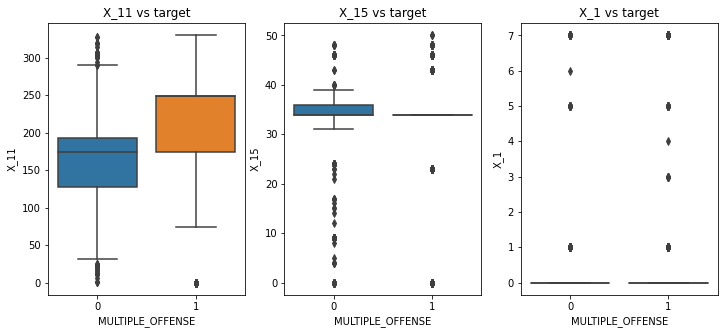

In [40]:
f,axes=plt.subplots(ncols=3, figsize=(12,5))

sns.boxplot(x="MULTIPLE_OFFENSE", y="X_11", data=new_df, ax=axes[0])
axes[0].set_title("X_11 vs target")

sns.boxplot(x="MULTIPLE_OFFENSE", y="X_15", data=new_df, ax=axes[1])
axes[1].set_title("X_15 vs target")

sns.boxplot(x="MULTIPLE_OFFENSE", y="X_1", data=new_df, ax=axes[2])
axes[2].set_title("X_1 vs target")

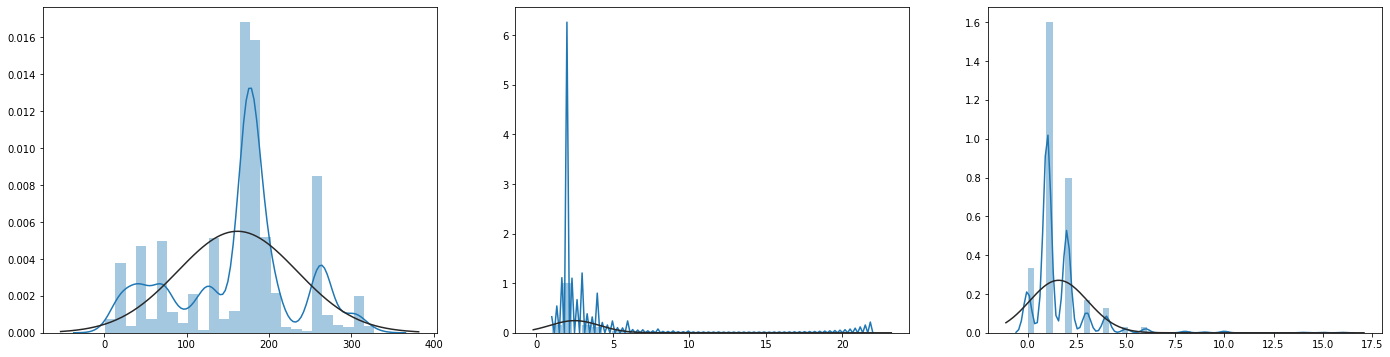

In [41]:
from scipy.stats import norm

f,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(24, 6))

x11=new_df['X_11'].loc[new_df['MULTIPLE_OFFENSE']==0].values
sns.distplot(x11, ax=ax1, fit=norm)

x10=new_df['X_10'].loc[new_df['MULTIPLE_OFFENSE']==0].values
sns.distplot(x10, ax=ax2, fit=norm)

x12=new_df['X_12'].loc[new_df['MULTIPLE_OFFENSE']==0].values
sns.distplot(x12, ax=ax3, fit=norm)

In [42]:
x11

array([179,  58, 192, ..., 174, 132, 263])

# Outlier Removal

In [43]:
x11_0=new_df['X_11'].loc[new_df['MULTIPLE_OFFENSE']==0].values
q25, q75=np.percentile(x11_0, 25), np.percentile(x11_0, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
x11_iqr = q75 - q25
print('iqr: {}'.format(x11_iqr))
x11_cutoff=x11_iqr*1.5
x11_lower, x11_upper=q25-x11_cutoff, q75+x11_cutoff
print('Cut Off: {}'.format(x11_cutoff))
print('x11 Lower: {}'.format(x11_lower))
print('x11 Upper: {}'.format(x11_upper))
outliers=[x for x in x11_0 if x<x11_lower or x>x11_upper]
print('Feature x11 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('x11 outliers:{}'.format(outliers))
new_df=new_df.drop(new_df[(new_df['X_11'] > x11_upper) |  (new_df['X_11'] < x11_lower)].index)


x10_0=new_df['X_10'].loc[new_df['MULTIPLE_OFFENSE']==0].values
q25, q75=np.percentile(x10_0, 25), np.percentile(x10_0, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
x10_iqr = q75 - q25
print('iqr: {}'.format(x10_iqr))
x10_cutoff=x10_iqr*1.5
x10_lower, x10_upper=1, 4
print('Cut Off: {}'.format(x10_cutoff))
print('x10 Lower: {}'.format(x10_lower))
print('x10 Upper: {}'.format(x10_upper))
outliers=[x for x in x10_0 if x<x10_lower or x>x10_upper]
print('Feature x10 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('x10 outliers:{}'.format(outliers))
new_df=new_df.drop(new_df[(new_df['X_10'] > x10_upper) |  (new_df['X_10'] < x10_lower)].index)


x12_0=new_df['X_12'].loc[new_df['MULTIPLE_OFFENSE']==0].values
q25, q75=np.percentile(x12_0, 25), np.percentile(x12_0, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
x12_iqr = q75 - q25
print('iqr: {}'.format(x12_iqr))
x12_cutoff=x12_iqr*1.5
x12_lower, x12_upper=0, 2.5
print('Cut Off: {}'.format(x12_cutoff))
print('x12 Lower: {}'.format(x12_lower))
print('x12 Upper: {}'.format(x12_upper))
outliers=[x for x in x12_0 if x<x12_lower or x>x12_upper]
print('Feature x12 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('x12 outliers:{}'.format(outliers))
new_df=new_df.drop(new_df[(new_df['X_12'] > x12_upper) |  (new_df['X_12'] < x12_lower)].index)

Quartile 25: 128.0 | Quartile 75: 193.0
iqr: 65.0
Cut Off: 97.5
x11 Lower: 30.5
x11 Upper: 290.5
Feature x11 Outliers for Fraud Cases: 97
x11 outliers:[11, 21, 21, 306, 294, 320, 21, 21, 328, 21, 21, 25, 300, 303, 306, 21, 303, 303, 25, 21, 303, 21, 21, 306, 291, 306, 21, 306, 21, 21, 21, 21, 328, 21, 25, 11, 21, 20, 21, 21, 319, 303, 21, 16, 21, 16, 6, 306, 303, 21, 21, 12, 21, 303, 21, 21, 306, 306, 303, 21, 306, 21, 21, 320, 21, 21, 21, 21, 11, 21, 21, 21, 1, 306, 21, 291, 306, 1, 306, 306, 303, 306, 1, 303, 21, 21, 303, 21, 11, 11, 21, 21, 314, 21, 21, 21, 306]
Quartile 25: 2.0 | Quartile 75: 2.0
iqr: 0.0
Cut Off: 0.0
x10 Lower: 1
x10 Upper: 4
Feature x10 Outliers for Fraud Cases: 61
x10 outliers:[10, 5, 6, 6, 5, 6, 6, 7, 8, 8, 18, 6, 6, 10, 6, 6, 5, 9, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 15, 8, 5, 6, 6, 10, 5, 6, 8, 6, 5, 6, 6, 5, 6, 8, 6, 5, 6, 6, 5, 22, 8, 12, 5, 9, 6, 8, 5, 5, 7, 5, 5]
Quartile 25: 1.0 | Quartile 75: 2.0
iqr: 1.0
Cut Off: 1.5
x12 Lower: 0
x12 Upper: 2.5
Feature x12 O

In [44]:
new_df.shape

(1521, 18)

In [45]:
new_df['X_12'].value_counts(normalize=True)

1.0    0.591419
0.0    0.225743
2.0    0.182838
Name: X_12, dtype: float64

In [46]:
len(new_df['X_10'])

1521

Text(0.5, 1.0, 'X_12 vs target')

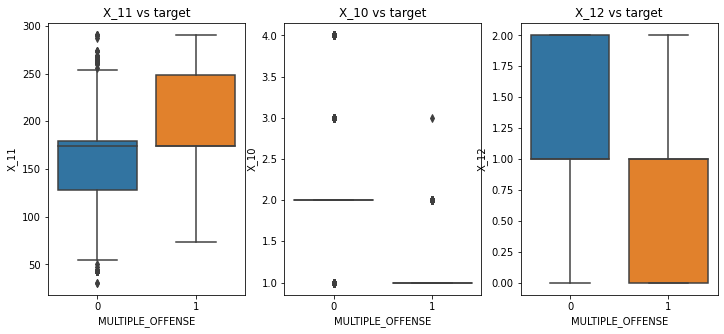

In [47]:
f,axes=plt.subplots(ncols=3, figsize=(12,5))

sns.boxplot(x="MULTIPLE_OFFENSE", y="X_11", data=new_df, ax=axes[0])
axes[0].set_title("X_11 vs target")

sns.boxplot(x="MULTIPLE_OFFENSE", y="X_10", data=new_df, ax=axes[1])
axes[1].set_title("X_10 vs target")

sns.boxplot(x="MULTIPLE_OFFENSE", y="X_12", data=new_df, ax=axes[2])
axes[2].set_title("X_12 vs target")


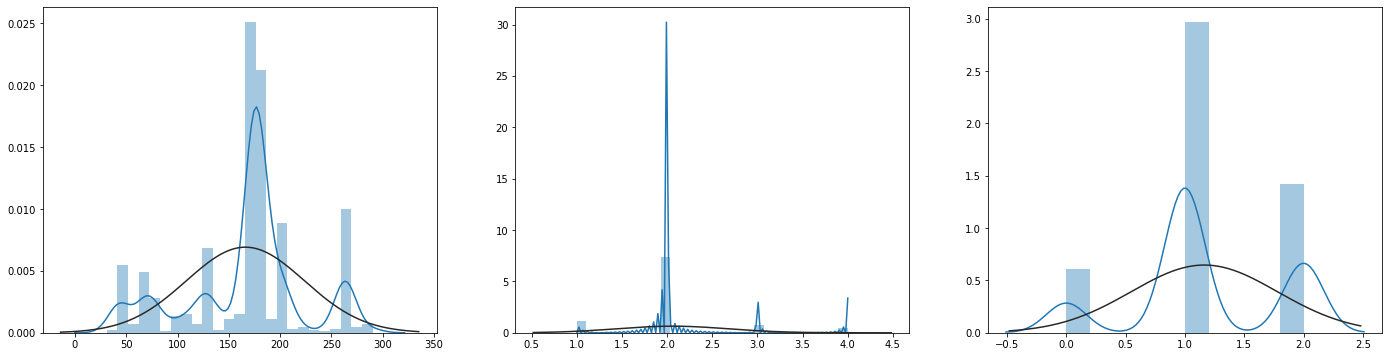

In [48]:
from scipy.stats import norm

f,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(24, 6))

x11=new_df['X_11'].loc[new_df['MULTIPLE_OFFENSE']==0].values
sns.distplot(x11, ax=ax1, fit=norm)

x10=new_df['X_10'].loc[new_df['MULTIPLE_OFFENSE']==0].values
sns.distplot(x10, ax=ax2, fit=norm)

x12=new_df['X_12'].loc[new_df['MULTIPLE_OFFENSE']==0].values
sns.distplot(x12, ax=ax3, fit=norm)

In [49]:
new_df.isnull().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                6
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [50]:
new_df['X_12']=new_df['X_12'].replace(np.nan, np.mean(new_df['X_12']))

In [51]:
new_df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_19922,1994-09-22,0,16,15,0,0,1,0,0,5,1,102,1.0,24,93,34,1
1,CR_24242,1994-03-18,0,49,49,6,5,6,4,0,5,3,179,1.0,112,62,36,0
3,CR_5034,1992-12-20,0,6,6,4,1,6,4,0,5,2,192,0.0,113,93,0,0
5,CR_110131,2005-01-13,0,36,34,2,1,1,0,0,5,1,174,1.0,92,93,36,0
8,CR_183454,2016-07-29,0,44,44,1,3,2,7,1,2,2,73,1.0,113,142,39,0


In [52]:
new_df.drop(columns=['INCIDENT_ID','DATE'], axis=1, inplace=True)

# Classifiers declaration

In [53]:
X=new_df.drop('MULTIPLE_OFFENSE', axis=1)
y=new_df['MULTIPLE_OFFENSE']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

classifiers = {
    "LogisiticRegression": LogisticRegression(max_iter=10000),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 90.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 77.0 % accuracy score
Classifiers:  SVC Has a training score of 69.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 97.0 % accuracy score


In [54]:
X_test.shape

(305, 15)

# Tuning and Cross validation using GridsearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]}



grid_log_reg = GridSearchCV(LogisticRegression(max_iter=10000), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)


svc = grid_svc.best_estimator_


tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  89.88%
Knears Neighbors Cross Validation Score 79.27%
Support Vector Classifier Cross Validation Score 90.54%
DecisionTree Classifier Cross Validation Score 98.11%


In [56]:
df.drop(columns=['INCIDENT_ID','DATE'], axis=1, inplace=True)

In [57]:
df['X_12']=df['X_12'].replace(np.nan, np.mean(new_df['X_12']))

In [58]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred=cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,method="decision_function")
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [59]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9578183212798599
KNears Neighbors:  0.789392943239097
Support Vector Classifier:  0.9515751698444006
Decision Tree Classifier:  0.979821389436774


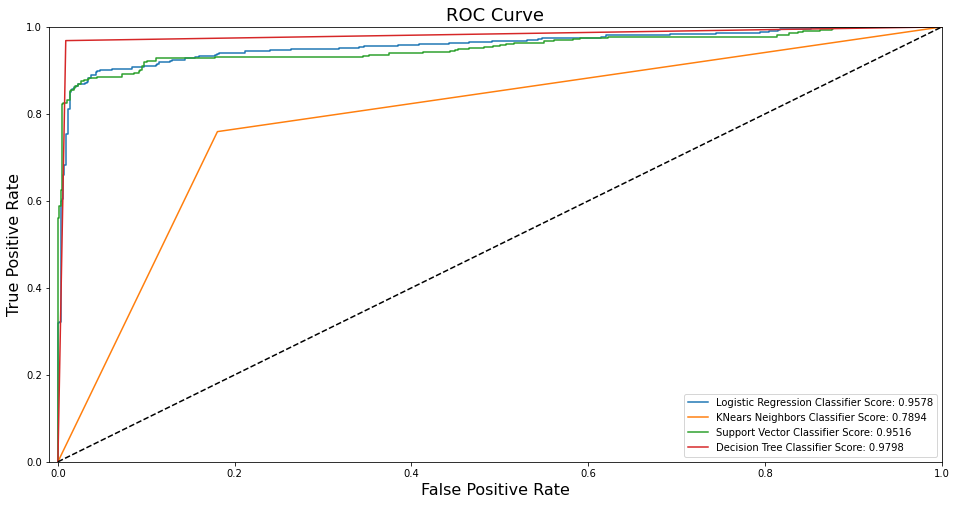

In [60]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [61]:
test_df=pd.read_csv(path+"Test.csv")

In [62]:
accuracy_score(y_train,tree_pred)

0.9810855263157895

In [63]:
test_pred=tree_clf.predict(X_test)

In [64]:
accuracy_score(y_test,test_pred)

0.980327868852459

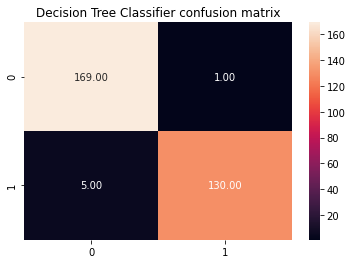

In [65]:
conf=confusion_matrix(y_test,test_pred)
sns.heatmap(conf, annot=True, fmt='.2f')
plt.title("Decision Tree Classifier confusion matrix")
plt.show()         

In [66]:
test_df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [67]:
test_df.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [68]:
test_df['X_12']=test_df['X_12'].replace(np.nan, np.mean(test_df['X_12']))

In [69]:
ind_df=test_df['INCIDENT_ID']
test_df.drop(columns=['INCIDENT_ID','DATE'], inplace=True)

In [70]:
res_pred=tree_clf.predict(test_df)

In [71]:
res_pred.shape

(15903,)

In [72]:
dataset = pd.DataFrame(data=res_pred[:])

In [73]:
dataset.columns=['MULTIPLE_OFFENSE']

In [74]:
dataset['MULTIPLE_OFFENSE'].value_counts(normalize=True)

1    0.882035
0    0.117965
Name: MULTIPLE_OFFENSE, dtype: float64

In [75]:
ind_df=pd.DataFrame(ind_df)

In [76]:
result=pd.merge(left=ind_df,right=dataset, left_index=True, right_index=True)

In [77]:
result

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1
...,...,...
15898,CR_44468,1
15899,CR_158460,0
15900,CR_115946,1
15901,CR_137663,1


In [78]:
result.set_index('INCIDENT_ID',inplace=True)

In [79]:
result.head()

,MULTIPLE_OFFENSE
INCIDENT_ID,
CR_195453,1
CR_103520,1
CR_196089,1
CR_112195,1
CR_149832,1


In [80]:
#result.to_csv("submission.csv")
#!cp submission.csv "drive/My Drive/"